## T-3 : 21510060
### Sahil Shivaji Patil

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Linear regression without scikit-learn (Refer linReg demo)

In [2]:
#a.	Load diabetes dataset from sklearn.
from sklearn.datasets import load_diabetes

In [3]:
diabetes=load_diabetes()

In [4]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

In [5]:
#b.	Extract features and target from the dataset.
x=diabetes.data
y=diabetes.target

In [6]:
print(x.shape)
print(x[:5])

(442, 10)
[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]


In [7]:
print(y.shape)
print(y[:5])

(442,)
[151.  75. 141. 206. 135.]


In [18]:
# b.	Preprocessing: Null value handling, standardization

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [9]:
# check null values
df=pd.DataFrame(data=diabetes.data , columns=diabetes.feature_names)
df.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [ ]:
# no null values, therefore no need to impute!

In [10]:
scaler=StandardScaler()
x_std=scaler.fit_transform(x)
x_std[:5]

array([[ 0.80050009,  1.06548848,  1.29708846,  0.45984057, -0.92974581,
        -0.73206462, -0.91245053, -0.05449919,  0.41853093, -0.37098854],
       [-0.03956713, -0.93853666, -1.08218016, -0.55350458, -0.17762425,
        -0.40288615,  1.56441355, -0.83030083, -1.43658851, -1.93847913],
       [ 1.79330681,  1.06548848,  0.93453324, -0.1192138 , -0.95867356,
        -0.71889748, -0.68024452, -0.05449919,  0.06015558, -0.54515416],
       [-1.87244107, -0.93853666, -0.24377122, -0.77064997,  0.25629203,
         0.52539714, -0.75764652,  0.72130245,  0.47698252, -0.19682291],
       [ 0.11317236, -0.93853666, -0.76494435,  0.45984057,  0.08272552,
         0.32789006,  0.17117751, -0.05449919, -0.67250161, -0.98056821]])

In [22]:
# c.	Data splitting: Split data as 70% train and 30% test.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3, random_state=42)

In [13]:
x_train.shape , x_test.shape

((309, 10), (133, 10))

In [26]:
# d.	Select a single input feature. Plot input feature against target variable.

C:\Users\thesa\AppData\Local\Temp\ipykernel_2872\1532316666.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=x_std[:,2],y=y,palette=["red"],marker="*")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


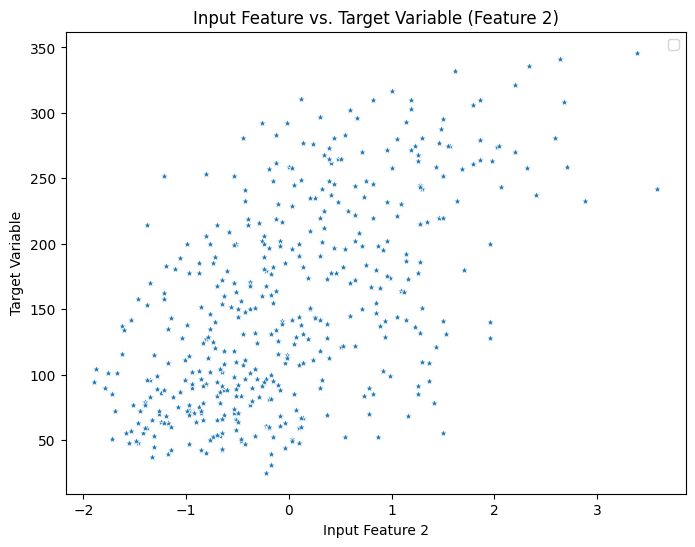

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_std[:,2],y=y,palette=["red"],marker="*")
plt.title(f"Input Feature vs. Target Variable (Feature 2)")
plt.xlabel(f"Input Feature 2")
plt.ylabel("Target Variable")
plt.legend()
plt.show()

In [25]:
# e.	Write functions for computing cost, gradients and gradient descent algorithm. (Save cost values of each iteration).
x_train_augmented = np.c_[np.ones(x_train.shape[0]), x_train]
# Function to compute cost
def compute_cost(x, y, theta):
    m = len(y)
    predictions = x.dot(theta)
    squared_errors = (predictions - y) ** 2
    cost = (1 / (2 * m)) * np.sum(squared_errors)
    return cost

def compute_gradients(x, y, theta):
    m = len(y)
    predictions = x.dot(theta)
    errors = predictions - y
    gradients = (1 / m) * x.T.dot(errors)
    return gradients

def gradient_descent(x, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        gradients = compute_gradients(x, y, theta)
        theta = theta - learning_rate * gradients
        cost = compute_cost(x, y, theta)
        cost_history.append(cost)

    return theta, cost_history


# Assuming X_train is the augmented feature matrix for training set and y_train is the target variable for training set
x_train_augmented = np.c_[np.ones(x_train.shape[0]), x_train]
initial_theta = np.zeros(x_train_augmented.shape[1])
learning_rate = 0.01
num_iterations = 1000

final_theta, cost_history = gradient_descent(x_train_augmented, y_train, initial_theta, learning_rate, num_iterations)

print("Final Theta:", final_theta)
print("Cost History:", cost_history)

Final Theta: [150.90762295   1.70714189 -12.2120561   26.82214894  18.06043193
  -6.92009352  -3.88852272 -10.39063773   8.34749301  17.43385838
   2.41032556]
Cost History: [14560.68959752879, 14218.08022408647, 13888.559817940717, 13571.379811314162, 13265.844876075444, 12971.308841797467, 12687.170933584224, 12412.872304469362, 12147.8928391782, 11891.74820787662, 11643.98715021702, 11404.188971545467, 11171.961234565191, 10946.937631069703, 10728.776019572815, 10517.156615781088, 10311.780323884106, 10112.367197586556, 9918.655020679851, 9730.397997755768, 9547.365546405656, 9369.341182931672, 9196.121494225119, 9027.515189046208, 8863.342222472984, 8703.432987778533, 8547.627570448067, 8395.775059464411, 8247.73291137427, 8103.366363001323, 7962.547888997916, 7825.15670072713, 7691.078283243346, 7560.203967393946, 7432.430534299256, 7307.659849683788, 7185.798525730721, 7066.757608314783, 6950.452287637486, 6836.801630444078, 6725.728332144759, 6617.15848729465, 6511.021377008395,

ValueError: x and y must be the same size

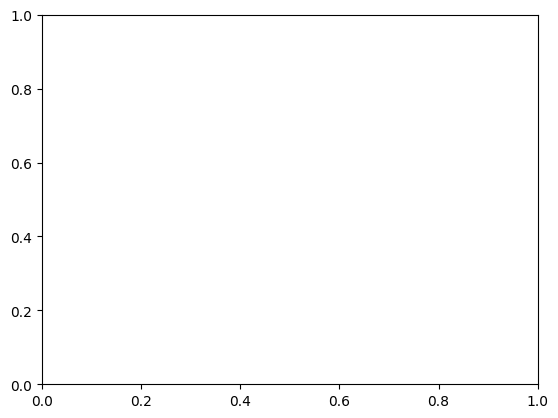

In [26]:
# f.	Plot regression line on scatter plot of feature vs target.

# Scatter plot of feature vs target
plt.scatter(x_train, y_train, label="Training Data")
plt.xlabel("Feature")
plt.ylabel("Target")


# Plotting the regression line
regression_line = x_train_augmented.dot(final_theta[:2])
plt.plot(x_train, regression_line, color='red', label="Regression Line")

plt.legend()
plt.title("Regression Line on Scatter Plot")
plt.show()

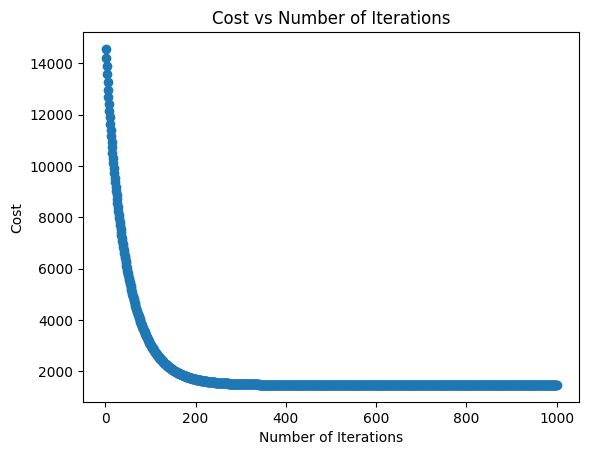

In [27]:
# g.	Plot cost vs #iterations.
# Plotting cost vs #iterations
plt.plot(range(1, num_iterations + 1), cost_history, marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Number of Iterations')
plt.show()

In [ ]:
# h.	Report parameter values, training error, test error and model accuracy.

In [29]:
# Function to compute mean squared error (training and test errors)
x_test_augmented = np.c_[np.ones(x_test.shape[0]), x_test]
def mean_squared_error(predictions, targets):
    return np.mean((predictions - targets) ** 2)

# Predictions on training set
y_train_predictions = x_train_augmented.dot(final_theta)

# Predictions on test set
y_test_predictions = x_test_augmented.dot(final_theta)

# Training error (mean squared error)
training_error = mean_squared_error(y_train_predictions, y_train)

# Test error (mean squared error)
test_error = mean_squared_error(y_test_predictions, y_test)

# Model accuracy (1 - normalized test error)
model_accuracy = 1 - (test_error / np.var(y_test))

# Report parameter values, training error, test error, and model accuracy
print("Final Parameters (Theta):", final_theta)
print("Training Error:", training_error)
print("Test Error:", test_error)
print("Model Accuracy:", model_accuracy)

Final Parameters (Theta): [150.90762295   1.70714189 -12.2120561   26.82214894  18.06043193
  -6.92009352  -3.88852272 -10.39063773   8.34749301  17.43385838
   2.41032556]
Training Error: 2948.6500661497666
Test Error: 2831.388686678977
Model Accuracy: 0.475504396642658


In [30]:
# Part 2: Linear regression with scikit-learn
# a.	Download dataset as per your batch. 
# b.	Preprocessing: Null value handling, standardization, replace categorical values with numeric values (e.g. 0, 1, 2 etc.)

In [31]:
df=pd.read_csv('energydata_complete.csv')

In [35]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [33]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [34]:
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [37]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [36]:
# Identify numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
non_numeric_columns = df.columns.difference(numeric_columns)

# Handling null values for numeric columns
imputer_numeric = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer_numeric.fit_transform(df[numeric_columns])

# non-numeric column = date ... no need to impute

In [39]:
#c.	Data splitting: Split data as 70% train and 30% test using train_test_split function.
X = df.drop(['date','Appliances'], axis=1)
y = df['Appliances']

# standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [41]:
X_train.shape , X_test.shape

((13814, 27), (5921, 27))

In [42]:
#d.	Feature selection: Dimensionality reduction / select manually

In [43]:
from sklearn.manifold import TSNE

In [45]:
# Perform t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

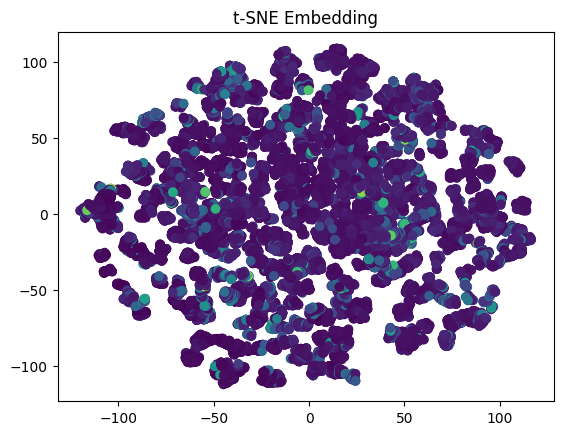

In [50]:
# Visualize t-SNE 
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE Embedding')
plt.show()

In [51]:
# e.	Fit model using fit function.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
# f.	Report parameter values, training error and test error and model accuracy.
from sklearn.metrics import mean_squared_error, r2_score

In [53]:

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Make predictions on the testing data
y_test_pred = model.predict(X_test)

# Compute training error (MSE)
train_error = mean_squared_error(y_train, y_train_pred)

# Compute test error (MSE)
test_error = mean_squared_error(y_test, y_test_pred)

# Compute model accuracy (R2 score)
model_accuracy = r2_score(y_test, y_test_pred)

# Report parameter values, training error, test error, and model accuracy
print("Parameter Values:")
print("Coefficient : ",model.coef_,"\nIntercept : ",model.intercept_)
print("Training Error (MSE):", train_error)
print("Test Error (MSE):", test_error)
print("Model Accuracy (R2 Score):", model_accuracy)

Parameter Values:
Coefficient :  [ 15.82928653  -1.86434525  61.22053338 -34.71350592 -52.04409467
  51.66770608  15.23916955  -7.83137429  -3.93760253  -2.96138653
   1.47608225  41.57414296  11.0724917    3.23391229  -7.13674343
  15.45177342 -23.70174735 -29.05959794  -4.95867371 -55.9696027
   1.4322404  -18.36017799   4.43572079   2.04327025  23.19129525
   0.28399166   0.28399166] 
Intercept :  98.01235987771346
Training Error (MSE): 8869.906291466978
Test Error (MSE): 8579.643142925755
Model Accuracy (R2 Score): 0.1672369015716163
